# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



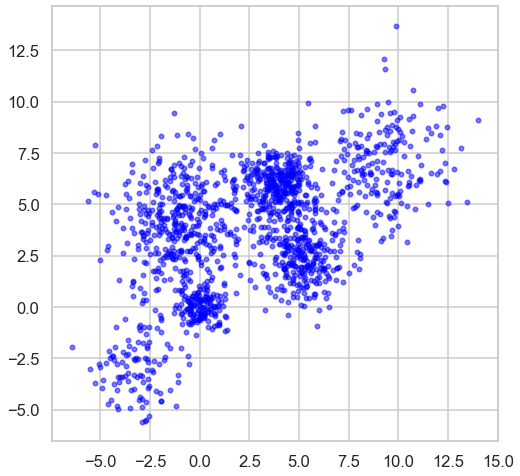

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [6]:
#This is a function that we will use it to display the data after clustering it using the scatter plot
def plot_clustered_data(data, labels):
    # Get unique labels
    unique_labels = set(labels)
    # Create a color map with a unique color for each label
    colors = plt.cm.get_cmap('Set1', len(unique_labels))

    # Plot the data points with a different color for each label
    for label in unique_labels:
        indices = (labels == label)
        plt.scatter(data[indices, 0], data[indices, 1], color=colors(label), label=f'Cluster {label}')

    # Add a legend and title
    plt.legend()
    plt.title(f'Clustered Data, number_of_clusters ={len(unique_labels) }')

    # Show the plot 
    plt.show()


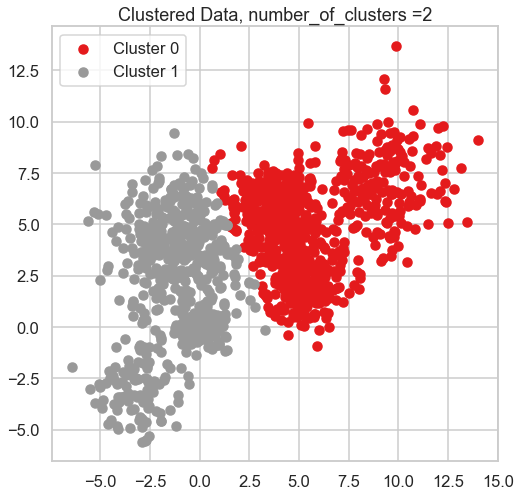

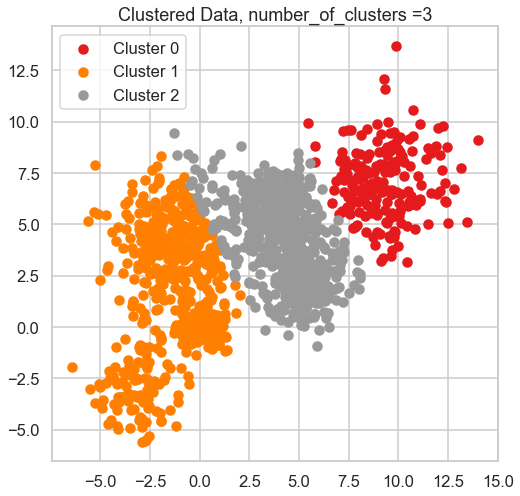

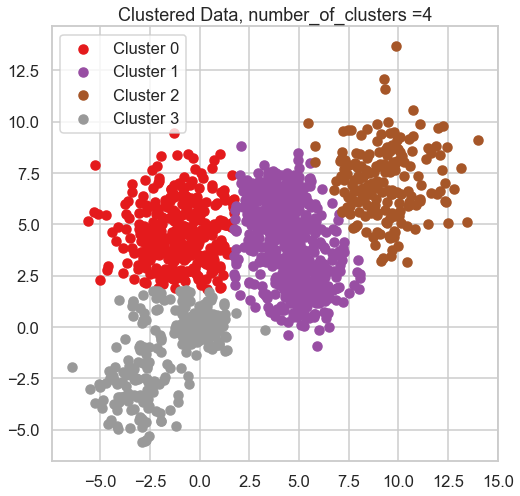

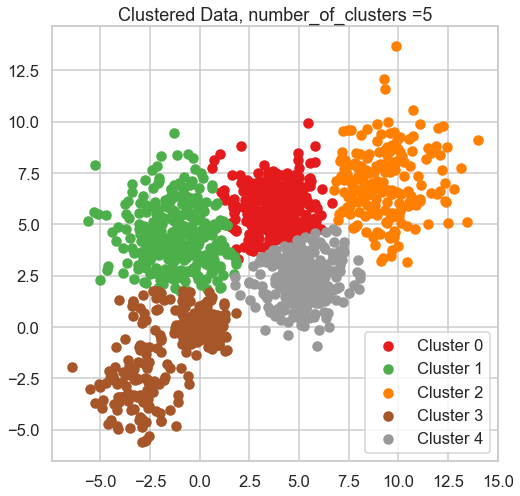

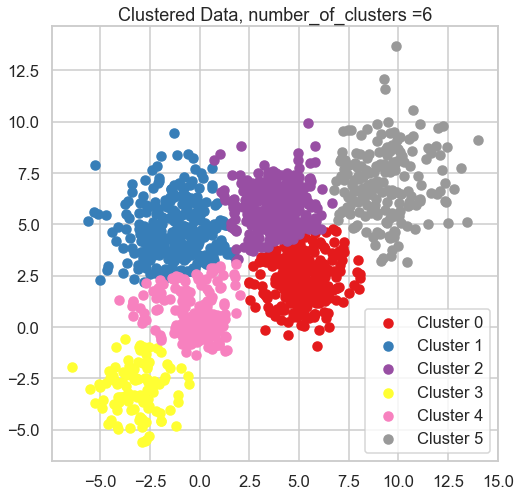

In [7]:
#kMeans clustering function
def kmeans_clustering(data, k):
   
    for i in range(2,k,1):
        kmeans = KMeans(n_clusters=i)
    
    # Fit KMeans object to the data
        kmeans.fit(data)
    
        # Retrieve cluster labels
        labels = kmeans.labels_
        # kMeans_labels = kmeans_clustering(data,i)
        if data.shape[1] <= 2:
            plot_clustered_data(data,labels)
        
        
    
    
kmeans_clustering(Multi_blob_Data,7)

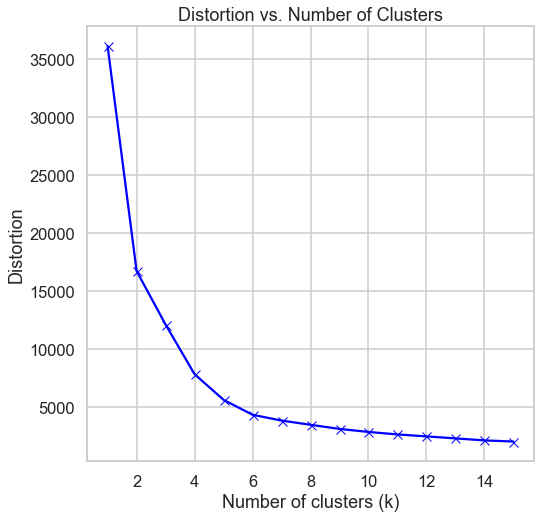

In [8]:
#plotting the distortion vs the number of the clusters so that we can detect the apprpriate k value from elbow method

def plot_elbow(data, kmax):
    
    # Initialize list to store distortion values
    distortions = []
    
    # Loop over values of k to calculate distortions
    for k in range(1, kmax+1):
        # Initialize KMeans object with current k value
        kmeans = KMeans(n_clusters=k)
        # Fit KMeans object to the data
        kmeans.fit(data)
        # Retrieve sum of squared distances (inertia) from KMeans object
        distortion = kmeans.inertia_
        # Append distortion value to list
        distortions.append(distortion)
        
    # Plot distortion function
    plt.plot(range(1, kmax+1), distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Distortion vs. Number of Clusters')
    plt.show()
plot_elbow(Multi_blob_Data,15)

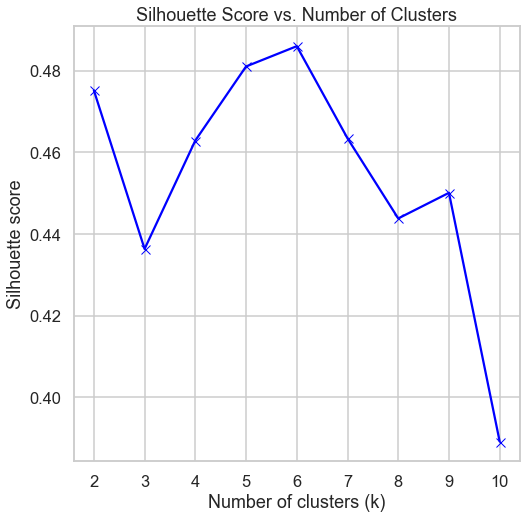

0.4859737366910219 6


In [9]:
#calculate the silhouette_score vs the number of the clusters so that we can detect the apprpriate k value
def plot_silhouette(data, kmax):
    # Initialize list to store silhouette scores
    silhouette_scores = []
    best_score = -1
    x = -1
    # Loop over values of k to calculate silhouette scores
    for k in range(2, kmax+1):
        # Initialize KMeans object with current k value
        kmeans = KMeans(n_clusters=k)
        # Fit KMeans object to the data
        kmeans.fit(data)
        # Compute silhouette score for current k value
        score = silhouette_score(data, kmeans.labels_)
        # Append silhouette score to list
        silhouette_scores.append(score)
        if score > best_score:
            best_score = score
            x = k
        
    # Plot silhouette scores
    plt.plot(range(2, kmax+1), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()
    print(best_score,x)
plot_silhouette(Multi_blob_Data,10)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [10]:
def dendrogram_plot(data) :
    linkage_methods = ['single', 'average']
    affinity_metrics = ['euclidean', 'cityblock', 'cosine']

    for linkage_method in linkage_methods:
        for affinity in affinity_metrics:   
            plt.figure(figsize=(15, 6))
            dendrogram(linkage(data, method=linkage_method, metric=affinity))
            plt.title(f"linkage method is: {linkage_method}, affinity metric is: {affinity}")
            plt.xlabel('Data points')
            plt.ylabel('Distance')
            plt.show()


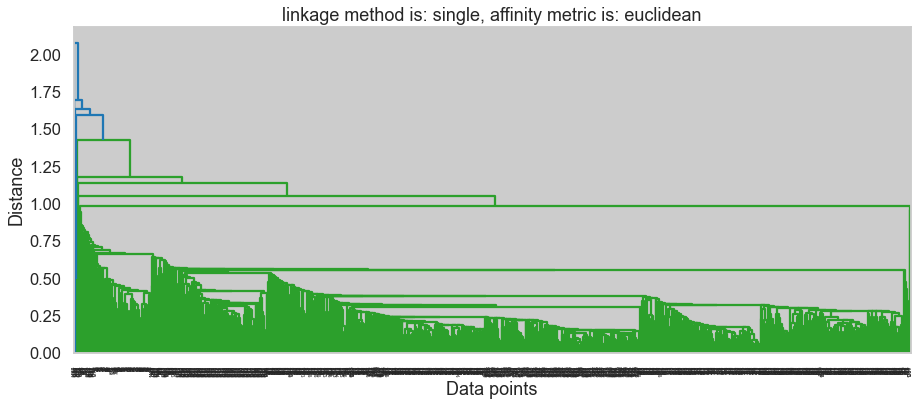

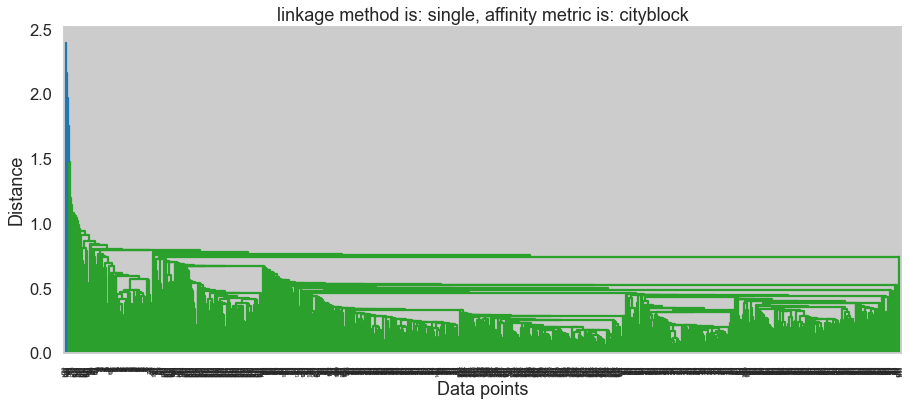

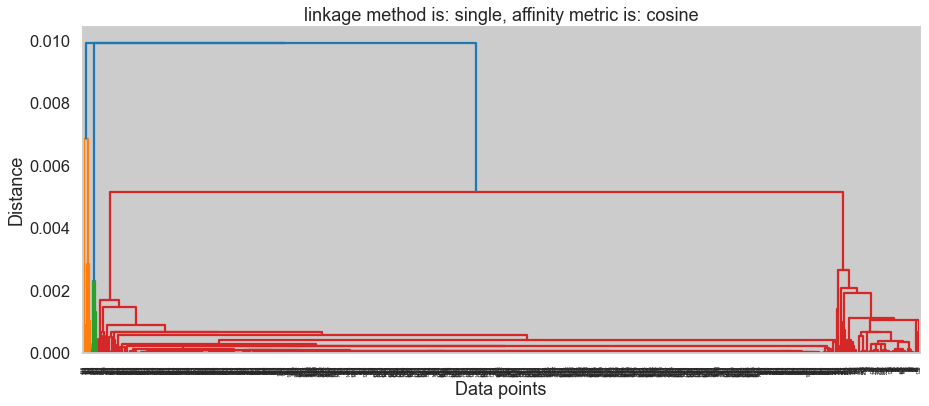

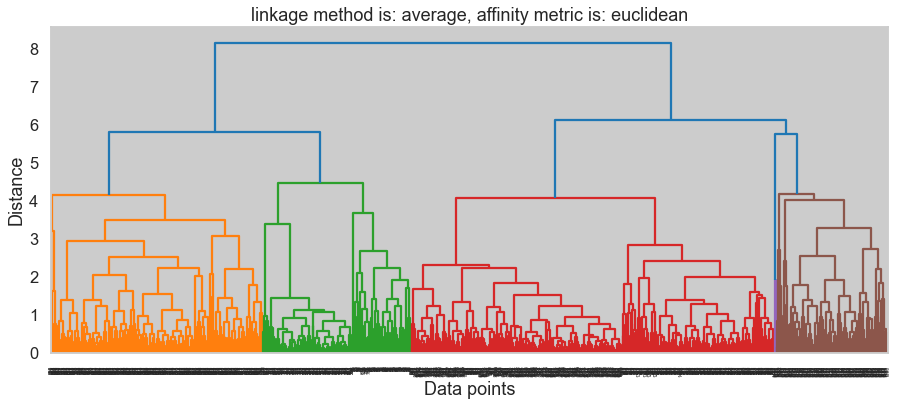

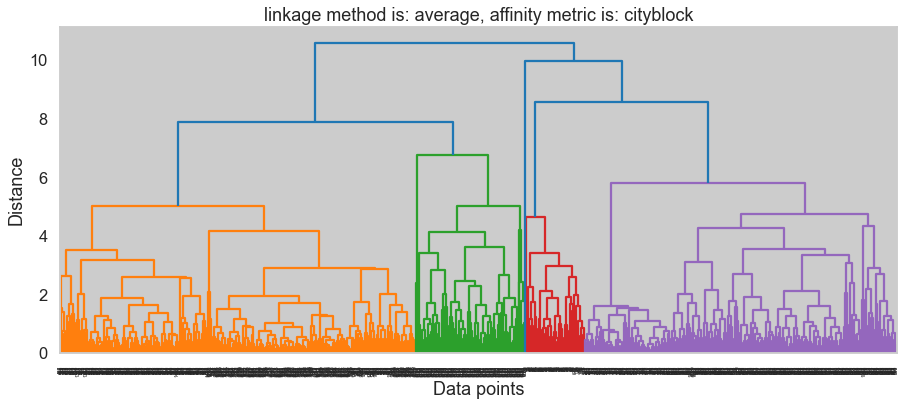

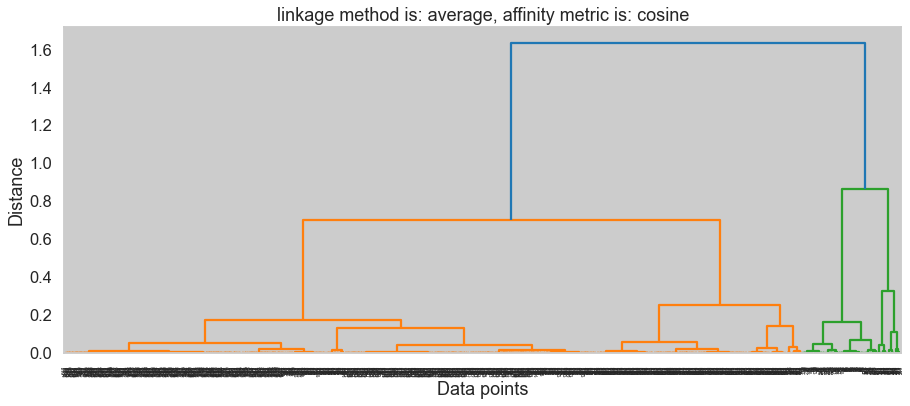

In [11]:
dendrogram_plot(Multi_blob_Data)

In [ ]:
hierarchal_Clustering(Multi_blob_Data,10)

No handles with labels found to put in legend.


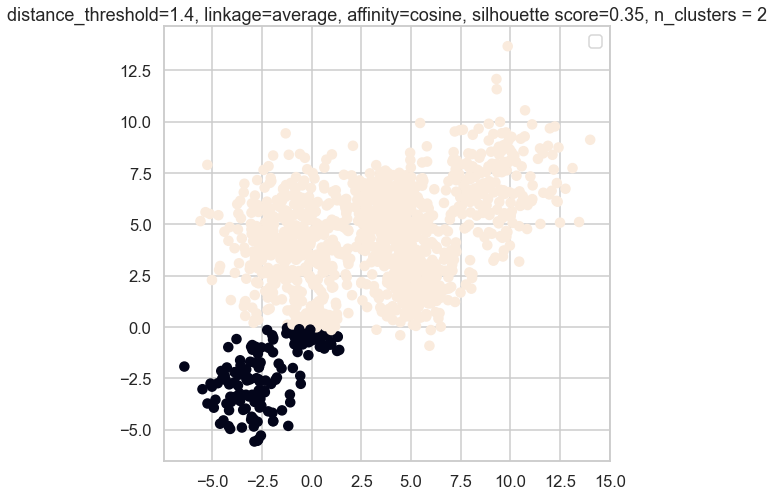

silhouette score:  0.35251834131557364
distance threshold:  1.4
linkage method:  average
affinity:  cosine
number of clusters:  2


In [12]:
hierarchal_Clustering2(Multi_blob_Data,1.4,'average','cosine')

In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
def hierarchal_Clustering(data,k) :
    # create a list of parameter combinations to try
    n_clusters = k
    linkage_methods = ['single', 'average']
    affinity_metrics = ['euclidean', 'manhattan', 'cosine']
    best_score = -1
    best_params = {}

    # iterate over the parameter combinations and compute the silhouette score and clusters
    for n in range(2,k,1):
        for linkage in linkage_methods:
            for affinity in affinity_metrics:
                params = {'affinity': affinity, 'linkage': linkage, 'n_clusters': n}

                # create an instance of AgglomerativeClustering
                agg = AgglomerativeClustering(n_clusters=n, linkage=linkage, affinity=affinity,distance_threshold=None)

                # fit the model to your dataset
                agg.fit(data)

                # compute the silhouette score
                score = silhouette_score(data, agg.labels_)

                if score > best_score:
                    best_score = score
                    best_params = params
                if data.shape[1] <= 2:

                    # plot the resulting clusters
                    plt.scatter(data[:, 0], data[:, 1], c=agg.labels_)
                    plt.title(f"n_clusters={n}, linkage={linkage}, affinity={affinity}, silhouette score={score:.2f}")
                    plt.show()
                
    print(best_score)
    print(best_params)

In [14]:
# hierarchal_Clustering(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score

def dbscan_clustering(data):

  eps_values = np.linspace(0.1, 3, 30)
  min_samples_values = np.arange(5, 26, 1)
  best_eps = None
  best_min_samples = None
  best_score = -1
  x = -1
  silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

  for i, eps in enumerate(eps_values):
      for j, min_samples in enumerate(min_samples_values):
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          dbscan.fit(data)
          labels = dbscan.labels_
          n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
          if n_clusters > 1:
              score = silhouette_score(data, labels)
          else:
              score = -1
          silhouette_scores[i, j] = score
          if score > best_score:
                  best_score = score
                  best_eps = eps
                  best_min_samples = min_samples
                  x = n_clusters
  if data.shape[1] <= 2:

      # Plot clusters
      plt.figure()
      plt.scatter(data[:, 0], data[:, 1], c=labels)

      plt.title(f"DBSCAN Clusters (eps={best_eps}, min_samples={best_min_samples},n_clusters = {x})")
      plt.show()

#   Plot silhouette score versus eps and min_samples
  fig, ax = plt.subplots()
  for j, min_samples in enumerate(min_samples_values):
      ax.plot(eps_values, silhouette_scores[:, j], label=f"min_samples={min_samples}")
  ax.legend()
  ax.set_xlabel("EPS")
  ax.set_ylabel("Silhouette Score")
  plt.show()
  print('Best silhouette score:', best_score)
  print('Best eps:', best_eps)
  print('Best min_samples:', best_min_samples)
  print('Best number of clusters: ', x)


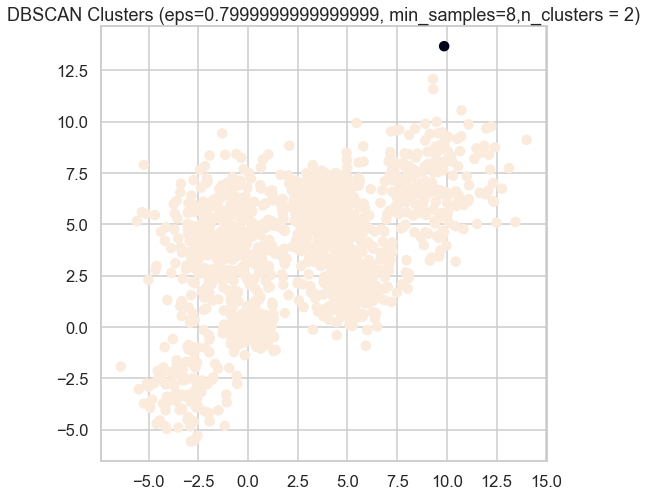

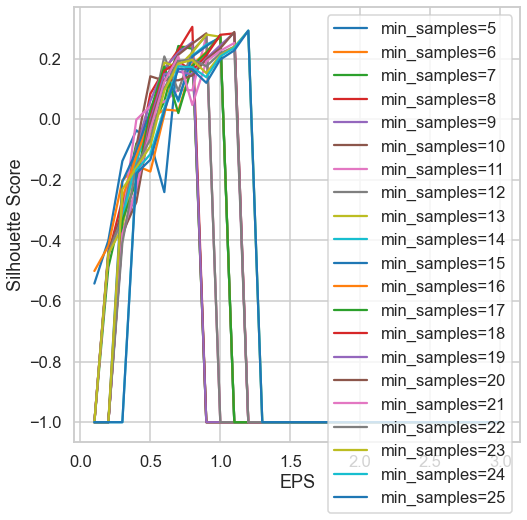

Best silhouette score: 0.3051951203876005
Best eps: 0.7999999999999999
Best min_samples: 8
Best number of clusters:  2


In [16]:
dbscan_clustering(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

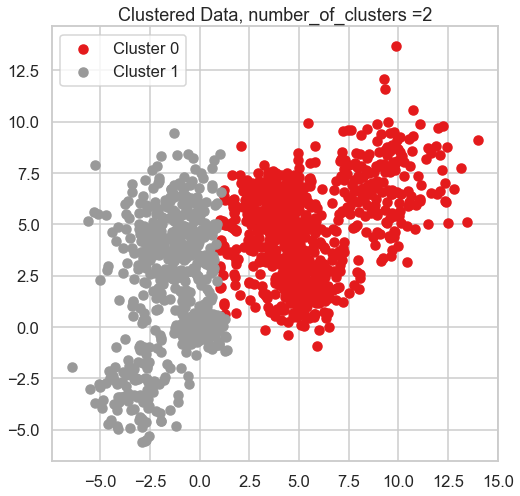

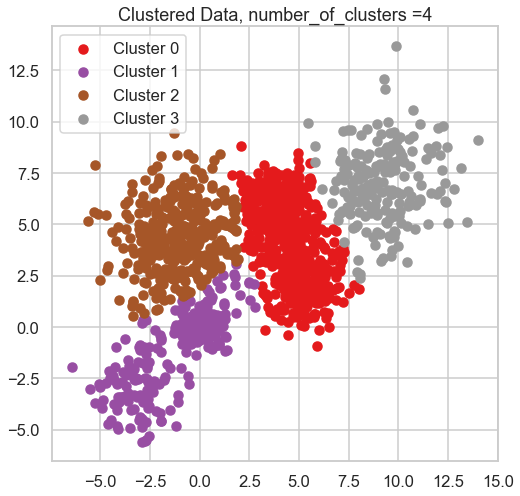

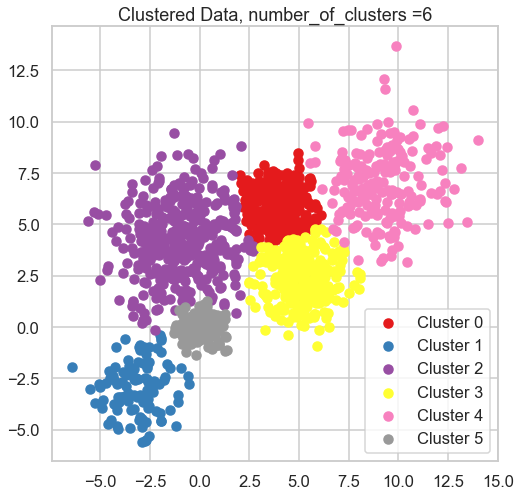

In [17]:
def gmm_clustering(X, n_clusters):
    for i in range(2,n_clusters,2):
        gmm = GaussianMixture(i)
        gmm.fit(X)
        labels = gmm.predict(X)
        plot_clustered_data(X,labels)
gmm_clustering(Multi_blob_Data,7)    

In [18]:
import matplotlib.cm as cm

def GMM_clustering(data):
    # Determine the number of features in the input data
    n_features = data.shape[1]
    
    # Find the best number of clusters using silhouette score
    best_score = -1
    best_n_clusters = -1
    best_gmm_model = None
    best_cov = None
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    for n_clusters in range(2, 80):
        for cov_type in covariance_types:
            gmm = GaussianMixture(n_components=n_clusters, covariance_type=cov_type, random_state=0)
            gmm.fit(data)
            labels = gmm.predict(data)
            score = silhouette_score(data, labels)
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_gmm_model = gmm
                best_cov = cov_type
    if(n_features<=2) :
        # Plot the GMM results for the best number of clusters
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        mins = np.min(data, axis=0) - 1
        maxs = np.max(data, axis=0) + 1
        xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100), np.linspace(mins[1], maxs[1], 100))
        colors = cm.rainbow(np.linspace(0, 1, best_n_clusters))
        for i, cov_type in enumerate(covariance_types):
            ax = axes[i//2][i%2]
            gmm = GaussianMixture(n_components=best_n_clusters, covariance_type=cov_type, random_state=0)
            gmm.fit(data)
            mesh_data = np.column_stack((xx.ravel(), yy.ravel()) + (np.zeros((xx.size, n_features - 2)),))
            Z = -gmm.score_samples(mesh_data)
            Z = Z.reshape(xx.shape)
            CS = ax.contourf(xx, yy, Z, levels=10, cmap='viridis')
            ax.axis('off')
            ax.set_title('GMM with {} covariance type and {} clusters'.format(cov_type, best_n_clusters), fontsize=12)

            ax.scatter(data[:, 0], data[:, 1], s=10, c=colors[gmm.predict(data)])

    # Show the plot
    plt.show()
    print(best_score,best_n_clusters,best_cov)


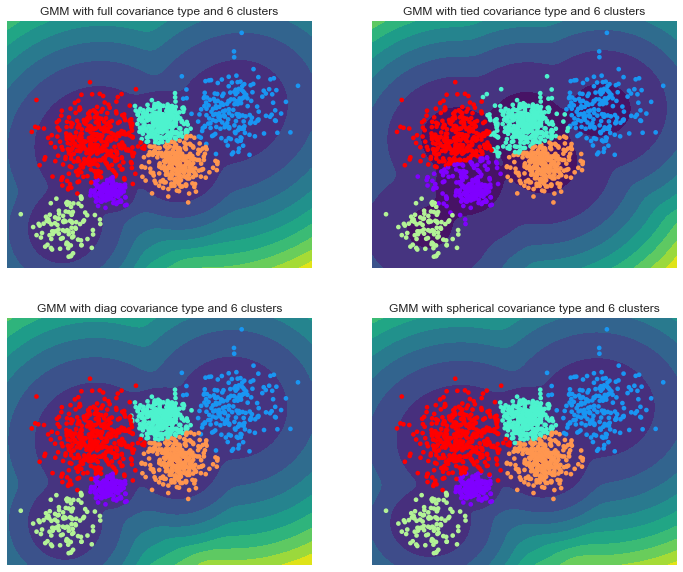

0.48567327695888446 6 tied


In [19]:
GMM_clustering(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [20]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
iris_data = iris_data['data']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Applying Clustering Algorithms Without Normalization

In [21]:
kmeans_clustering(iris_data,5)

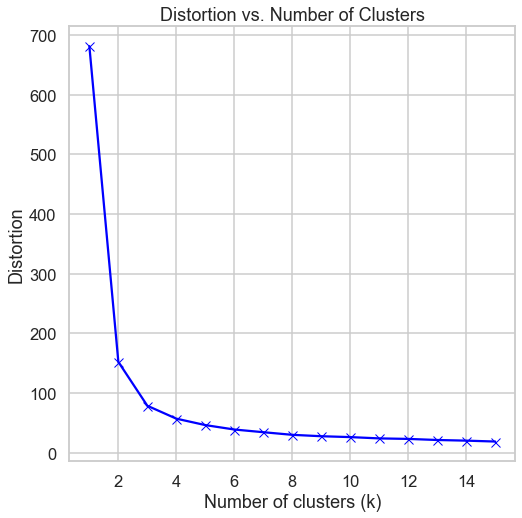

In [22]:
plot_elbow(iris_data,15)

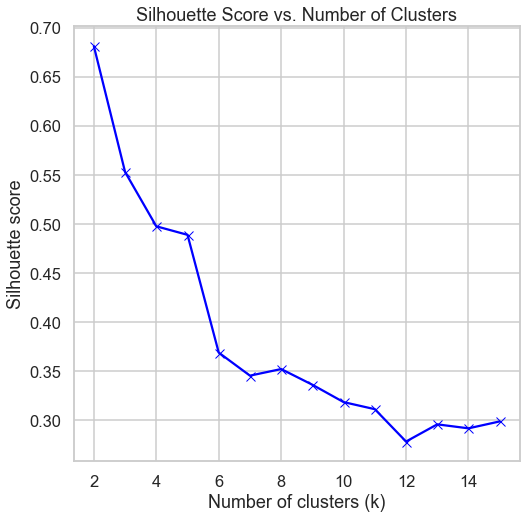

0.6810461692117462 2


In [23]:
plot_silhouette(iris_data,15)

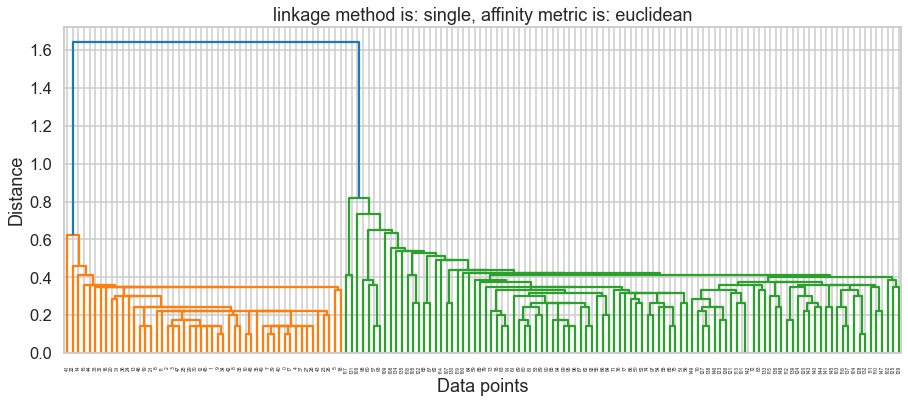

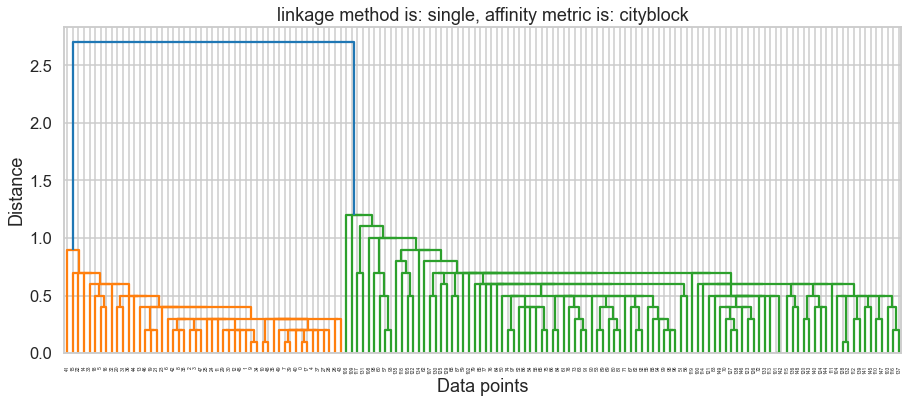

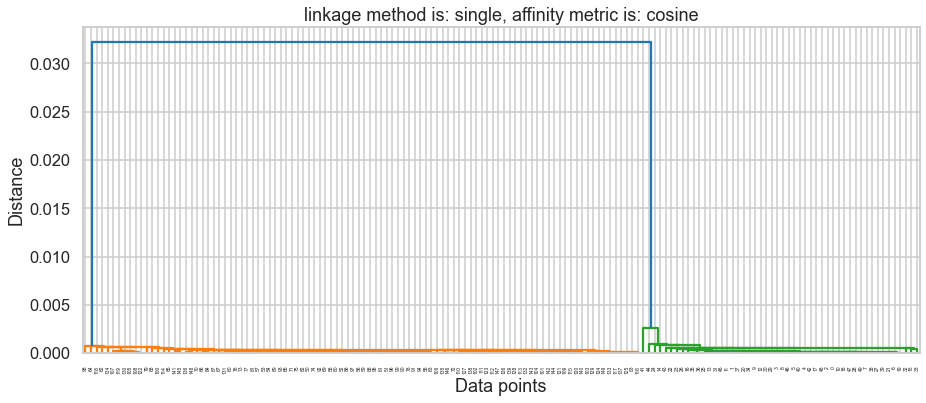

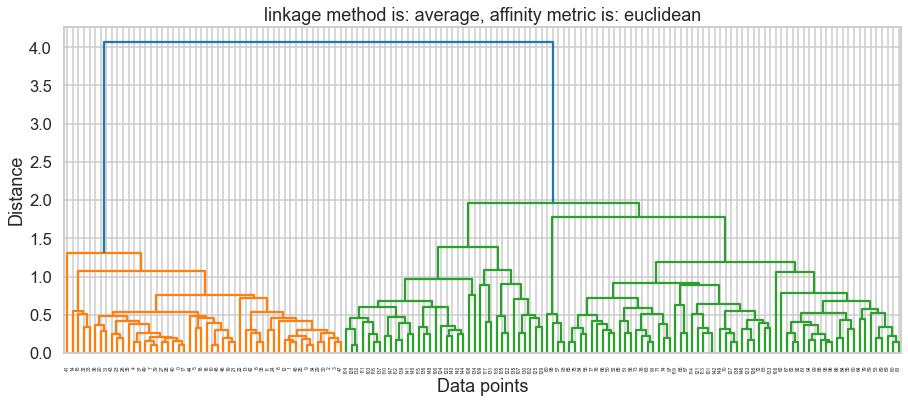

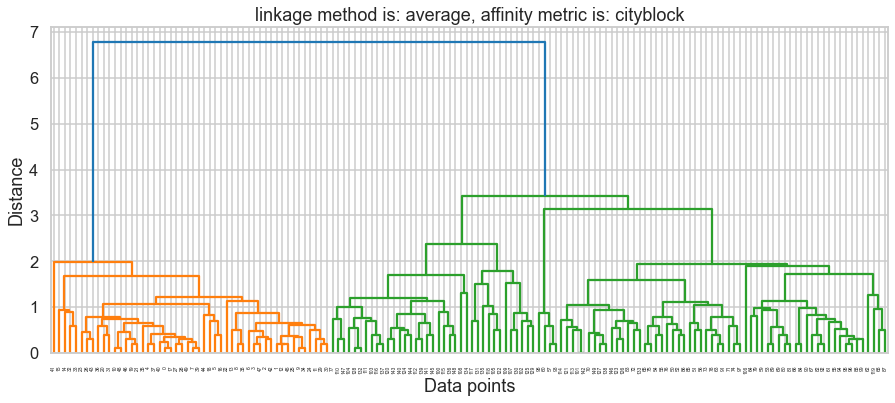

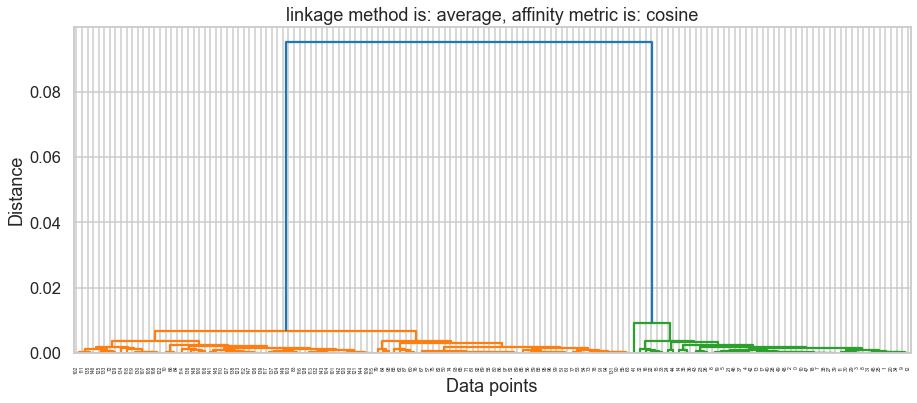

In [24]:
dendrogram_plot(iris_data)

In [52]:
hierarchal_Clustering(iris_data,100)

0.6867350732769777
{'affinity': 'euclidean', 'linkage': 'single', 'n_clusters': 2}


In [25]:
hierarchal_Clustering2(iris_data,3,'average','cityblock')

silhouette score:  0.47195185980984994
distance threshold:  3
linkage method:  average
affinity:  cityblock
number of clusters:  4


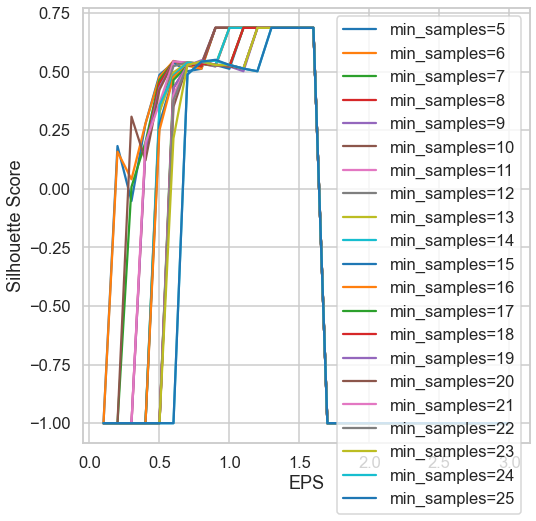

Best silhouette score: 0.6867350732769777
Best eps: 0.8999999999999999
Best min_samples: 5
Best number of clusters:  2


In [26]:
dbscan_clustering(iris_data)

In [27]:
GMM_clustering(iris_data)

0.6867350732769777 2 full


## Normalizing iris Dataset using MinMaxScaler

In [28]:

scaler = MinMaxScaler()

# fit and transform the data
scaled_iris_data = scaler.fit_transform(iris_data)


## Applying Clustering Algorithms After Normalization 

In [29]:
kmeans_clustering(scaled_iris_data,5)

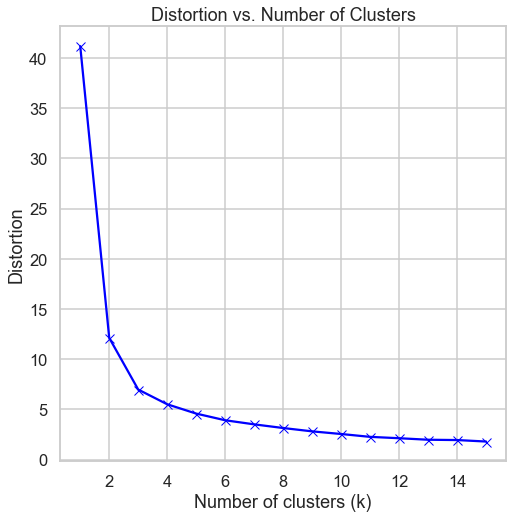

In [30]:
plot_elbow(scaled_iris_data,15)

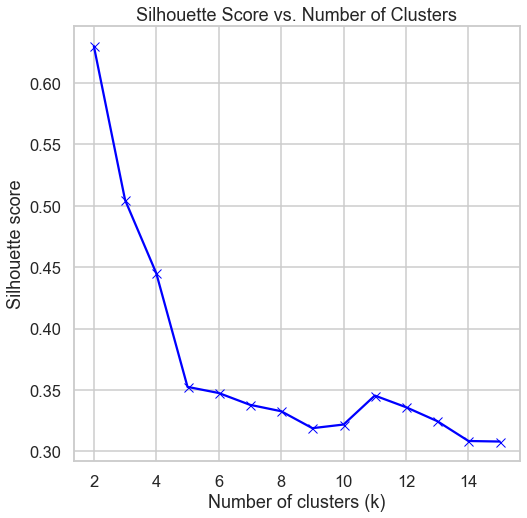

0.6300471284354711 2


In [31]:
plot_silhouette(scaled_iris_data,15)

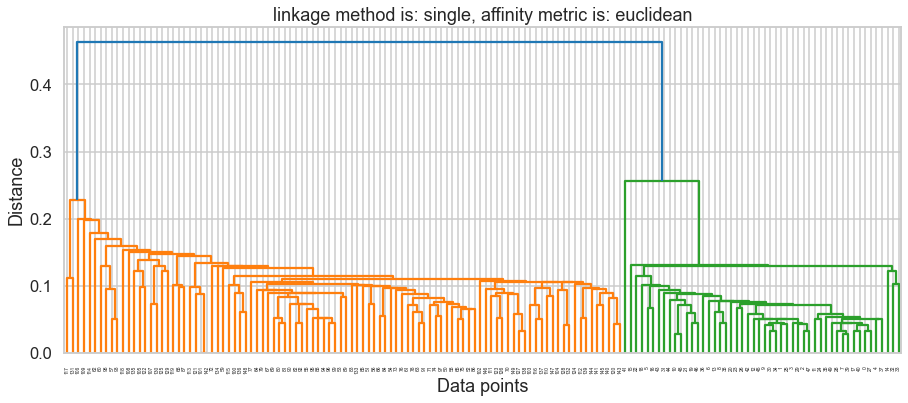

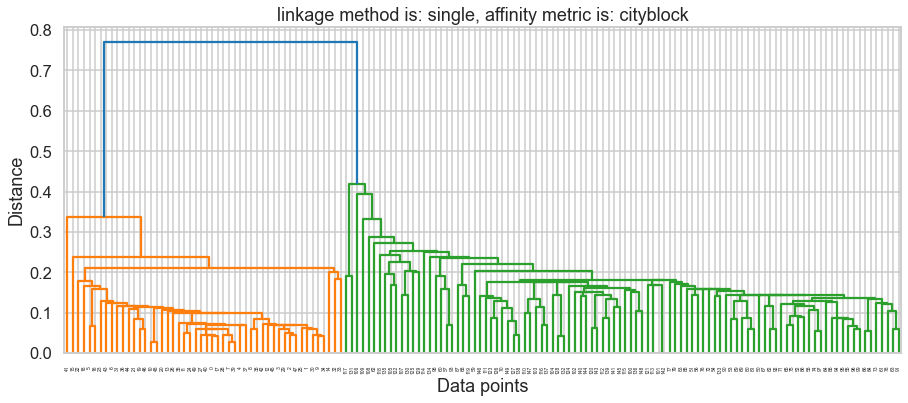

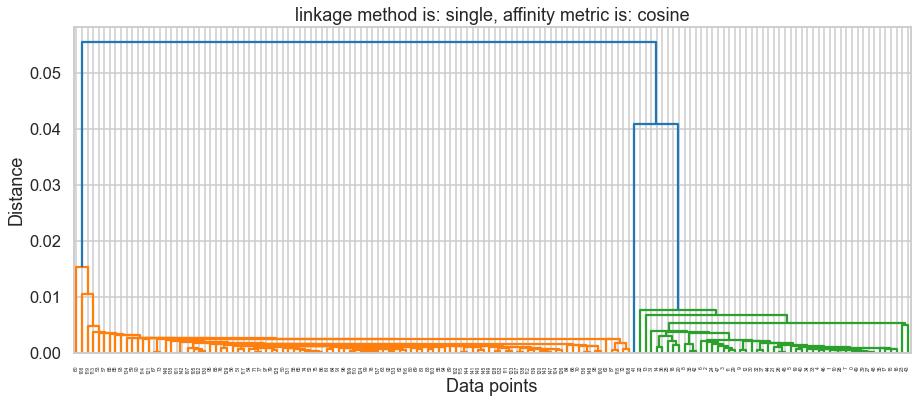

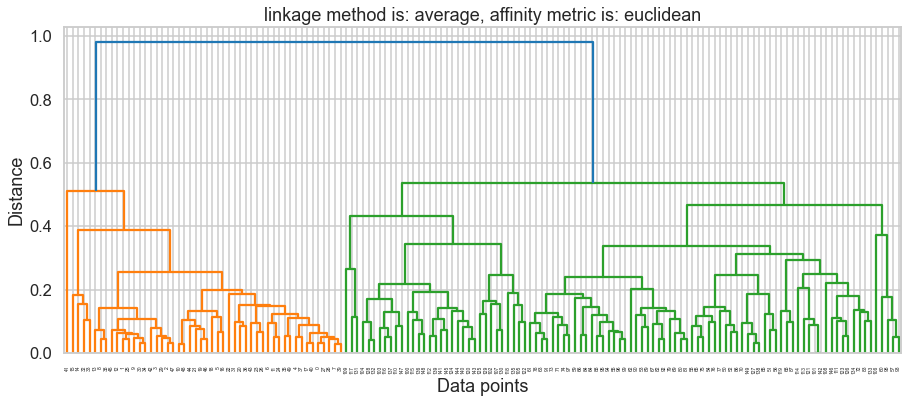

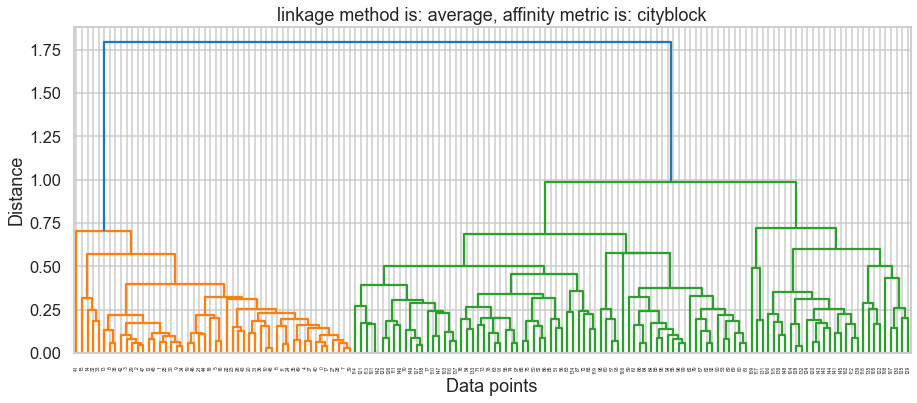

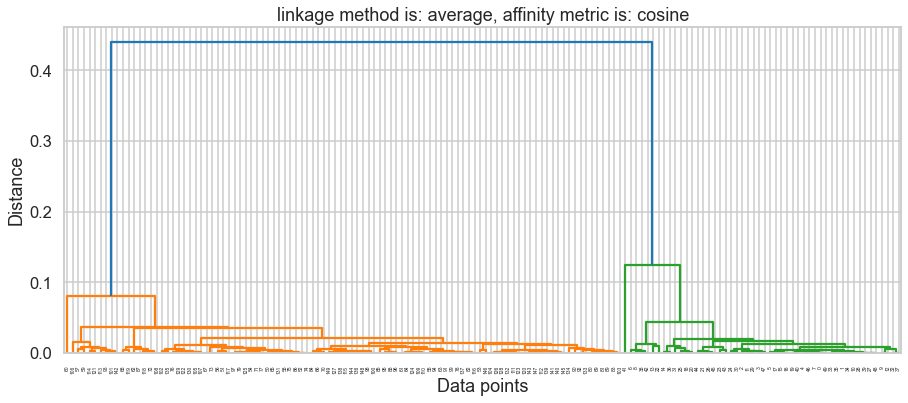

In [32]:
dendrogram_plot(scaled_iris_data)

In [51]:
hierarchal_Clustering(scaled_iris_data,100)

0.6300471284354711
{'affinity': 'euclidean', 'linkage': 'single', 'n_clusters': 2}


In [33]:
hierarchal_Clustering2(scaled_iris_data,0.8,'average','euclidean')


silhouette score:  0.6300471284354711
distance threshold:  0.8
linkage method:  average
affinity:  euclidean
number of clusters:  2


In [34]:
hierarchal_Clustering2(scaled_iris_data,0.75,'average','cityblock')

silhouette score:  0.5023126876272325
distance threshold:  0.75
linkage method:  average
affinity:  cityblock
number of clusters:  3


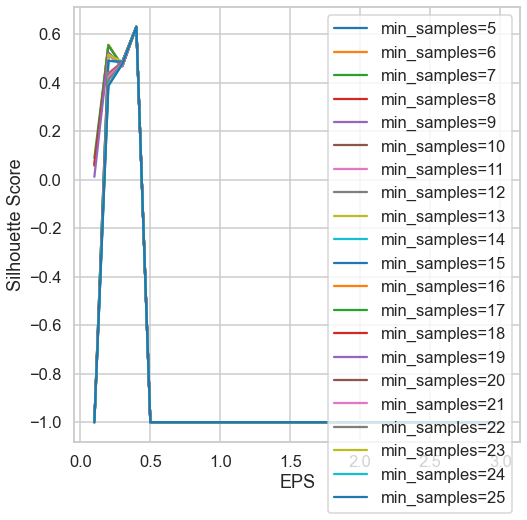

Best silhouette score: 0.6300471284354711
Best eps: 0.4
Best min_samples: 5
Best number of clusters:  2


In [35]:
dbscan_clustering(scaled_iris_data)

In [36]:
GMM_clustering(scaled_iris_data)

0.6300471284354711 2 full


## Customer dataset
Repeat all the above on the customer data set 

## Applying Clustering Algorithms for Customer Dataset --------- >


## Kmeans Clustering, Elbow Method, and Silhouette Score

In [38]:

# from sklearn import preprocessing

# df = pd.read_csv("https://drive.google.com/file/d/1uRfjkt6ED47CUbKEsKwaSRff-FzySpQ7/view?usp=share_link")
df = pd.read_csv("Customer_Data.csv")
df = df.drop(['ID'],axis=1)
# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
scaled_customer_data = scaler.fit_transform(df)




In [39]:
kmeans_clustering(scaled_customer_data,11)

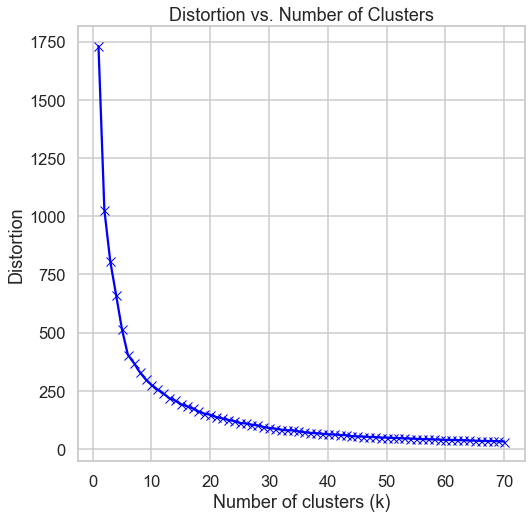

In [40]:
plot_elbow(scaled_customer_data, 70)

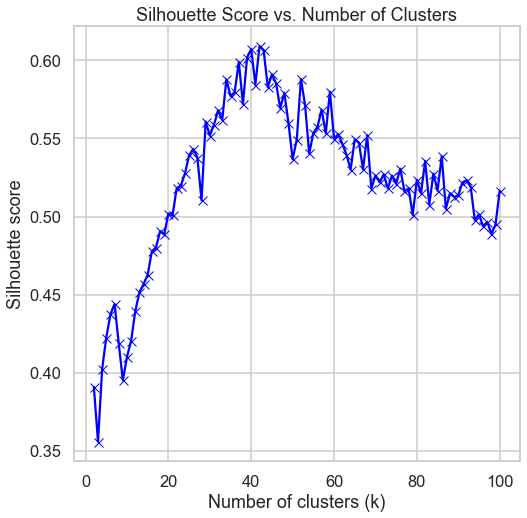

0.6091269268970159 42


In [41]:
plot_silhouette(scaled_customer_data, 100)

## Plotting Dendrogram and Applying Hierarchal Clustering

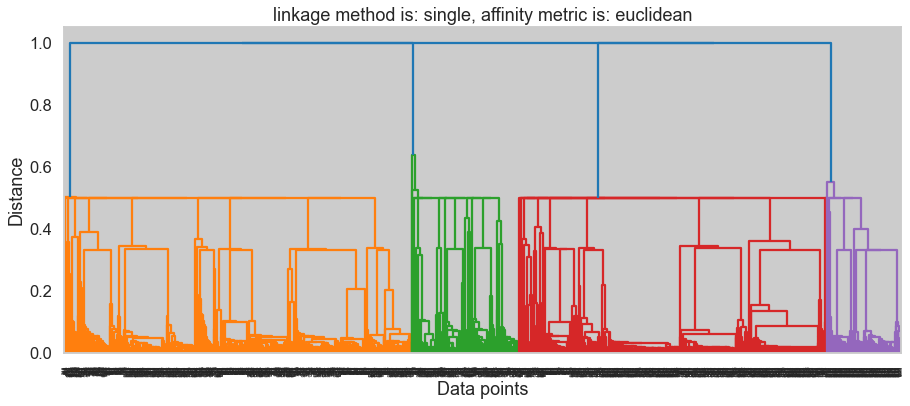

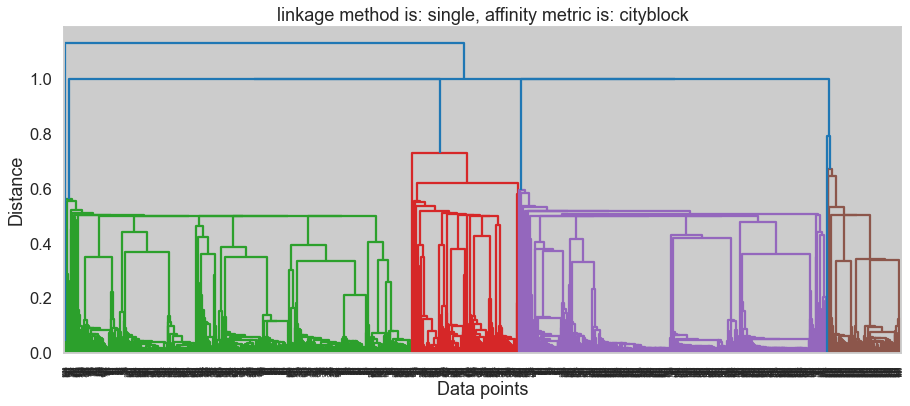

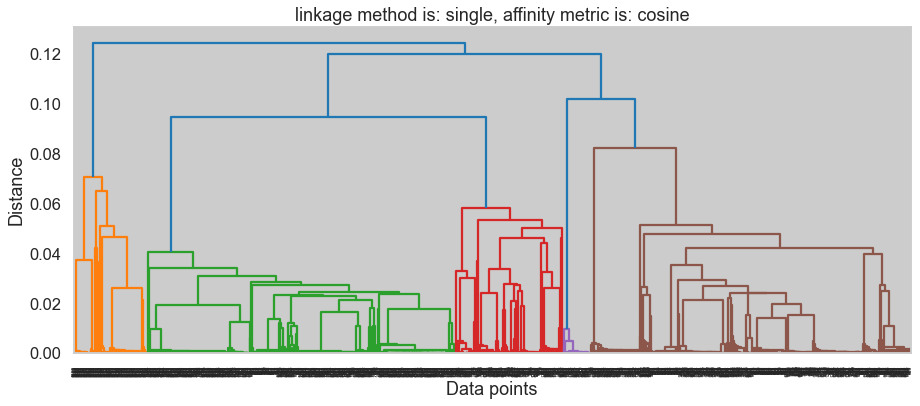

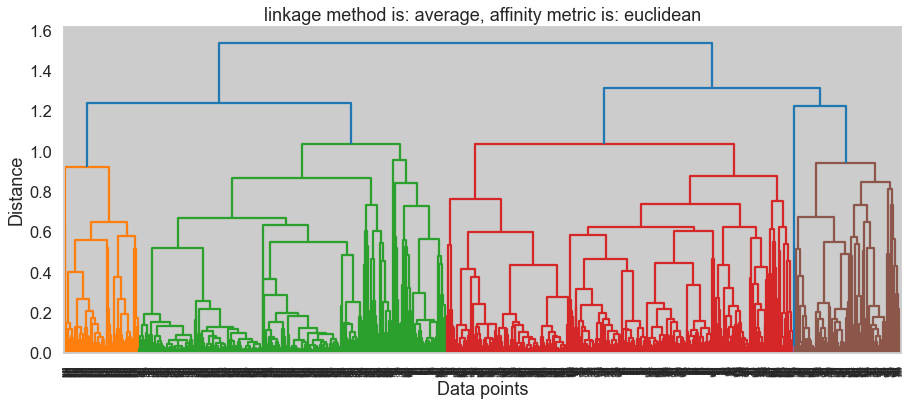

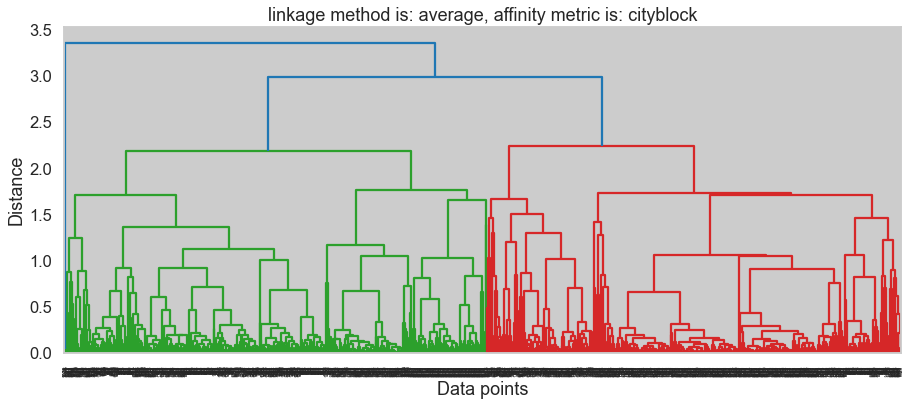

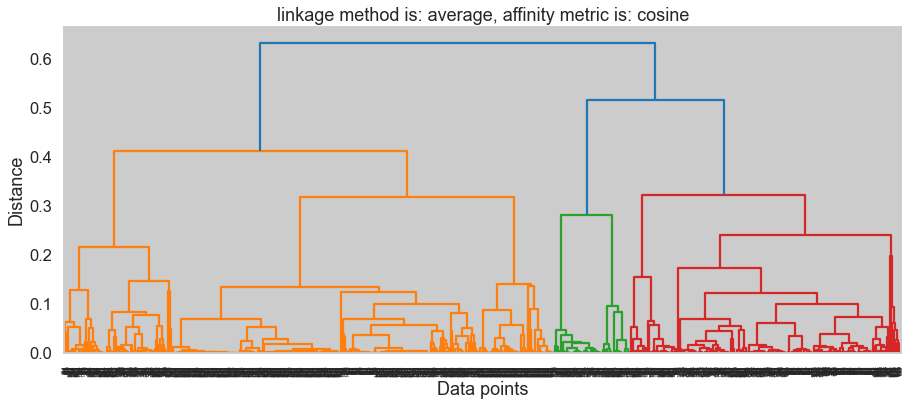

In [42]:
dendrogram_plot(scaled_customer_data)

In [48]:
hierarchal_Clustering(scaled_customer_data,100)

0.6522300904573621
{'affinity': 'manhattan', 'linkage': 'average', 'n_clusters': 85}


## Applying DBScan Clustering

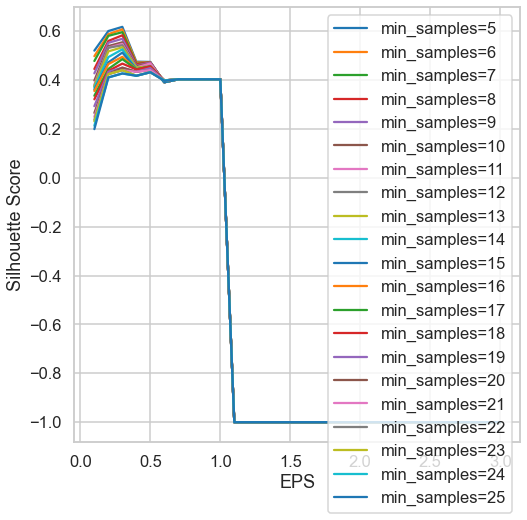

Best silhouette score: 0.6183605686166684
Best eps: 0.3
Best min_samples: 5
Best number of clusters:  53


In [43]:
dbscan_clustering(scaled_customer_data)

## Applying GMM Clustering 

In [44]:
GMM_clustering(scaled_customer_data)

0.5948324115153641 51 tied


In [45]:
#kMeans clustering function
def kmeans_clustering2(data):
   # Initialize list to store distortion values
    distortions = []
     # Initialize list to store silhouette scores
    silhouette_scores = []
    best_score = -1
    n = -1

    for i in range(2,100,2):
        kmeans = KMeans(n_clusters=i)
    
    # Fit KMeans object to the data
        kmeans.fit(data)
    
        # Retrieve cluster labels
        labels = kmeans.labels_
        # Retrieve sum of squared distances (inertia) from KMeans object
        # Append distortion value to list
        distortions.append(kmeans.inertia_)
         # Compute silhouette score for current k value
        silhouette = silhouette_score(data, kmeans.labels_)
        # Append silhouette score to list
        silhouette_scores.append(silhouette)
        if silhouette > best_score:
            best_score = silhouette
            n = i
        


    
    # Plot distortion function
    plt.plot(range(2,100,2), distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Distortion vs. Number of Clusters')
    plt.show()
   
        
    # Plot silhouette scores
    plt.plot(range(2, 100,2), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()
    print(best_score,n)


In [46]:


def hierarchal_Clustering2(data,dist,linkage,affinity) :
    
    agg = AgglomerativeClustering(n_clusters=None, linkage=linkage, affinity=affinity,distance_threshold=dist)

    # fit the model to your dataset
    agg.fit(data)

    # compute the silhouette score
    score = silhouette_score(data, agg.labels_)

    un = set(agg.labels_)
    if data.shape[1] <= 2:

        # plot the resulting clusters
        plt.scatter(data[:, 0], data[:, 1], c=agg.labels_)
        plt.legend()

        plt.title(f"distance_threshold={dist}, linkage={linkage}, affinity={affinity}, silhouette score={score:.2f}, n_clusters = {len(un)}")

        plt.show()

    print('silhouette score: ',score)
    print('distance threshold: ',dist)
    print('linkage method: ',linkage)
    print('affinity: ',affinity)
    print('number of clusters: ',len(un))
